In [17]:
%pylab inline
import numpy as np
from IPython.core.display import Image
import matplotlib.pyplot as plt
from scipy.special import erfc

Populating the interactive namespace from numpy and matplotlib


# Oceanic Plates

En este script se muestra el desarrollo de las ecuaciones de flujo de calor dependientes de la temperatura para un modelo de enfriamiento de la litósfera en un medio-espacio.

#### a) A continuación, se muestran histogramas de la temperatura en una dorsal en función de la distancia horizontal a la dorsal -x- y la profundidad -z-, para velocidades medias de 0.5 cm/yr, 4 cm/yr y 10 cm/yr. Para ello se usa la siguiente ecuación:

$$\frac{T-T_{1}}{T_{o}-T_{1}} = erfc\frac{z}{2\sqrt{k\frac{x}{v}}}$$

donde:  
T es la temperatura en el punto x,z (K).  
T1 es la temperatura en el manto (K).  
To es la temperatura en la superficie (K).  
k es la difusividad térmica (m^2/s)
z es la profundidad (m).  
x es la distancia horizontal a la dorsal (m).  
v es la velocidad media de la dorsal (m/s).

In [18]:
#Constantes y arreglos de entrada
k=10**-6 #difusividad térmica m^2/s
T1To= 1300 #diferencia de temperatura manto-superficie T1-To(K)
T1= 1573.15 #temperatura en el manto (K)
z = np.linspace(0,-20000,2000) #profundidades a evaluar en el modelo: 0 a 20 km
x = np.linspace(-15000,15000,3000) #distancias horizontales a la dorsal en el modelo: -15 a 15 km con 0 el centro de la dorsal.
xx, zz= np.meshgrid(x,z) #convertir vectores z y x en una rejilla de coordenadas para hacer los histogramas

In [19]:
#Definir función para calcular la temperatura
def TerfC(x,z,v):
    return T1 + (-T1To*erfc(abs(z)/(2*np.sqrt(k*(abs(x)/v)))))

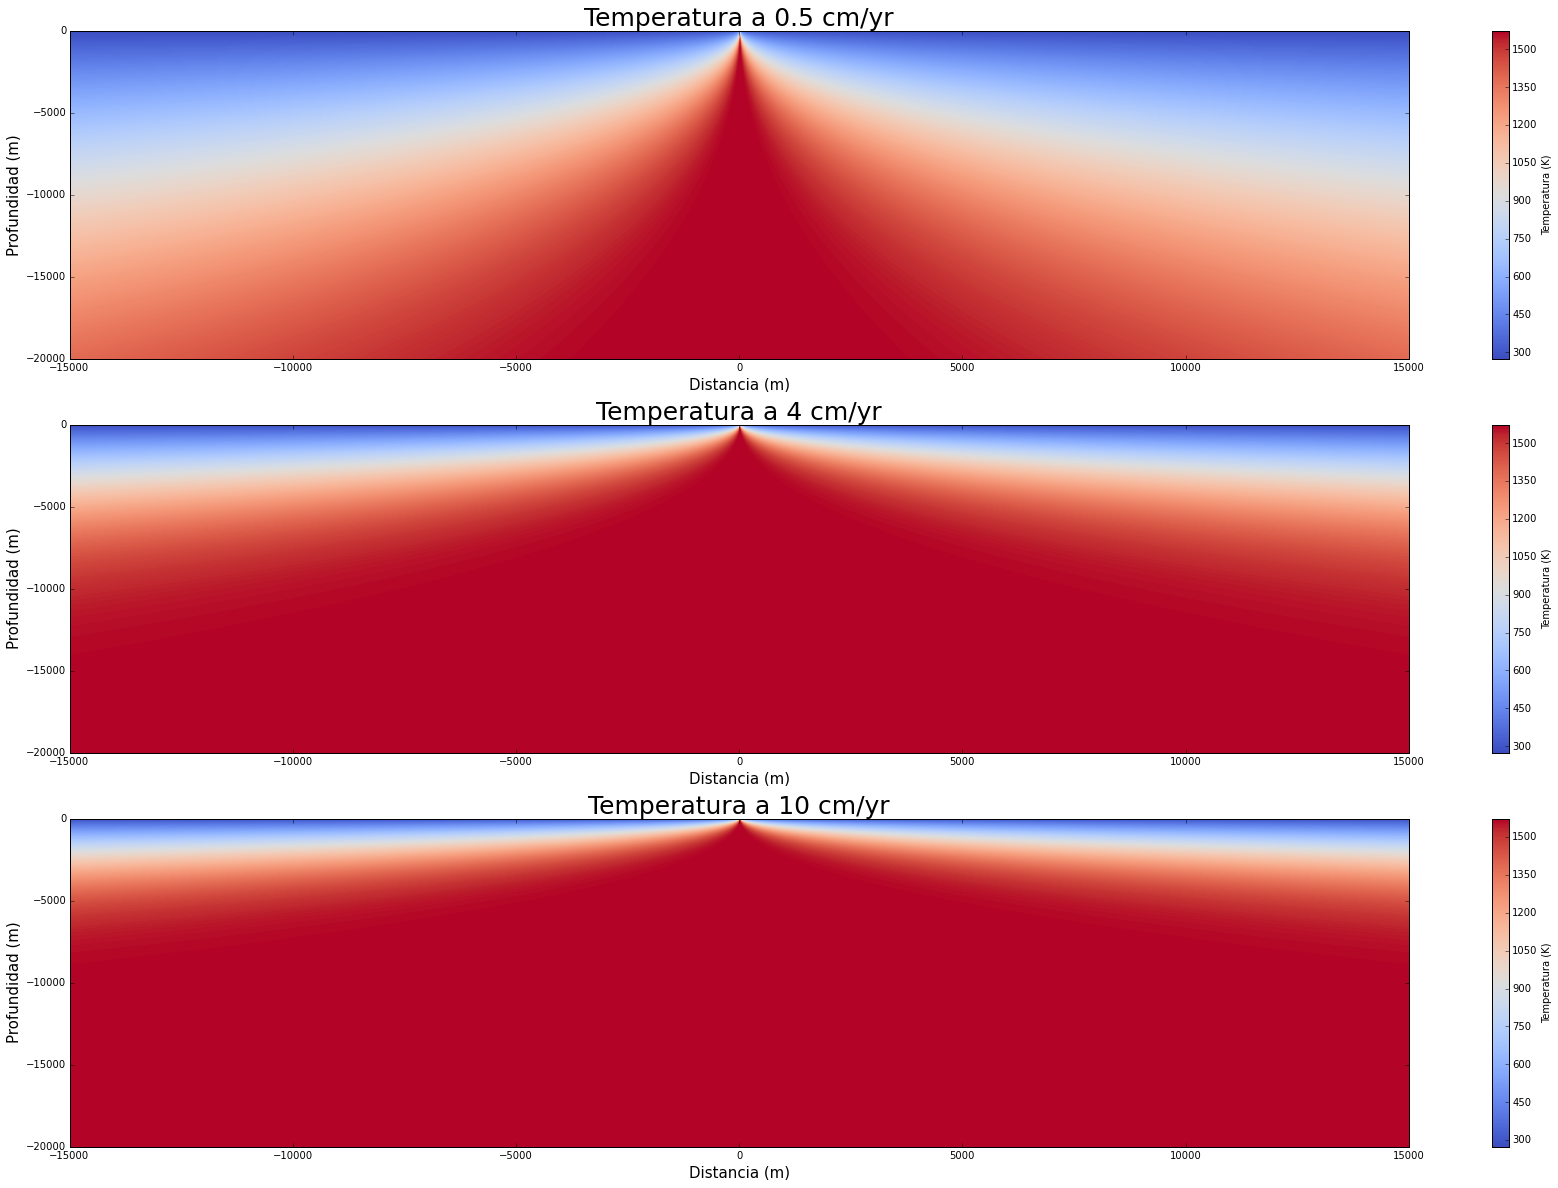

In [20]:
#Calculos y gráficos de la temperatura en función de la distancia horizontal x y la profundidad z
fig = plt.subplots(nrows=3, ncols=1, figsize=(30, 20))
plt.subplot(3,1,1)
#Calculos y gráfico para 0.5cm/yr
v1 = 0.5*(1/100.0)*(1/(365.0*24.0*3600.0)) #cambiar unidades de la velocidad a m por segundo
T05= TerfC(xx,zz,v1)
imshow(T05,extent=[x.min(), x.max(), z.min(), z.max()],cmap=cm.coolwarm,aspect= 'auto')
barra=plt.colorbar()
barra.set_label('Temperatura (K)')
plt.title('Temperatura a 0.5 cm/yr', fontsize=25)
plt.xlabel('Distancia (m)', fontsize=15)
plt.ylabel('Profundidad (m)', fontsize=15)
plt.subplot(3,1,2)
#Calculos y gráfico para 4cm/yr
v2 = 4.0*(1/100.0)*(1/(365.0*24.0*3600.0)) #cambiar unidades de la velocidad a m por segundo
T4= TerfC(xx,zz,v2)
imshow(T4,extent=[x.min(), x.max(), z.min(), z.max()], cmap=cm.coolwarm,aspect= 'auto')
barra=plt.colorbar()
barra.set_label('Temperatura (K)')
plt.title('Temperatura a 4 cm/yr', fontsize=25)
plt.xlabel('Distancia (m)', fontsize=15)
plt.ylabel('Profundidad (m)', fontsize=15)
plt.subplot(3,1,3)
#Calculos y gráfico para 10cm/yr
v3 = 10.0*(1/100.0)*(1/(365.0*24.0*3600.0)) #cambiar unidades de la velocidad a m por segundo
T10 = TerfC(xx,zz,v3)
imshow(T10,extent=[x.min(), x.max(), z.min(), z.max()],cmap=cm.coolwarm,aspect= 'auto')
barra=plt.colorbar()
barra.set_label('Temperatura (K)')
plt.title('Temperatura a 10 cm/yr', fontsize=25)
plt.xlabel('Distancia (m)', fontsize=15)
plt.ylabel('Profundidad (m)', fontsize=15)
plt.show()

Las gráficas obtenidas muestran que a medida que aumenta la velocidad media las temperaturas más frias se encuentran a menor profundidad. Por lo anterior, a 0.5 cm/yr se pueden encontrar temperaturas de 900K a 10km de profundidad mientras que a 10 cm/yr se encuentran a 2.5km. Adicionalmente, se puede observar que la geometría de cono observada para los tres casos es más cerrada a menor temperatura.

#### b) A continuación, se muestran gráficos del espesor de la litósfera oceánica en una dorsal, para velocidades medias de 0.5 cm/yr, 4 cm/yr y 10 cm/yr. Para ello se usa la siguiente ecuación:

$$z=2.32*\frac{kx}{v}^{0.5}$$

Donde:  
z es el espesor (m)  
k es la difusividad térmica (m^2/s)  
x es la distancia horizontal a la dorsal (m)  
v es la velocidad media de la dorsal (m/s)

In [21]:
#Definir función del espesor (se pone un menos porque estamos manejando profundidades negativas como convención)
def espesor(x,v):
    return -2.32*np.sqrt(k*(abs(x)/v))

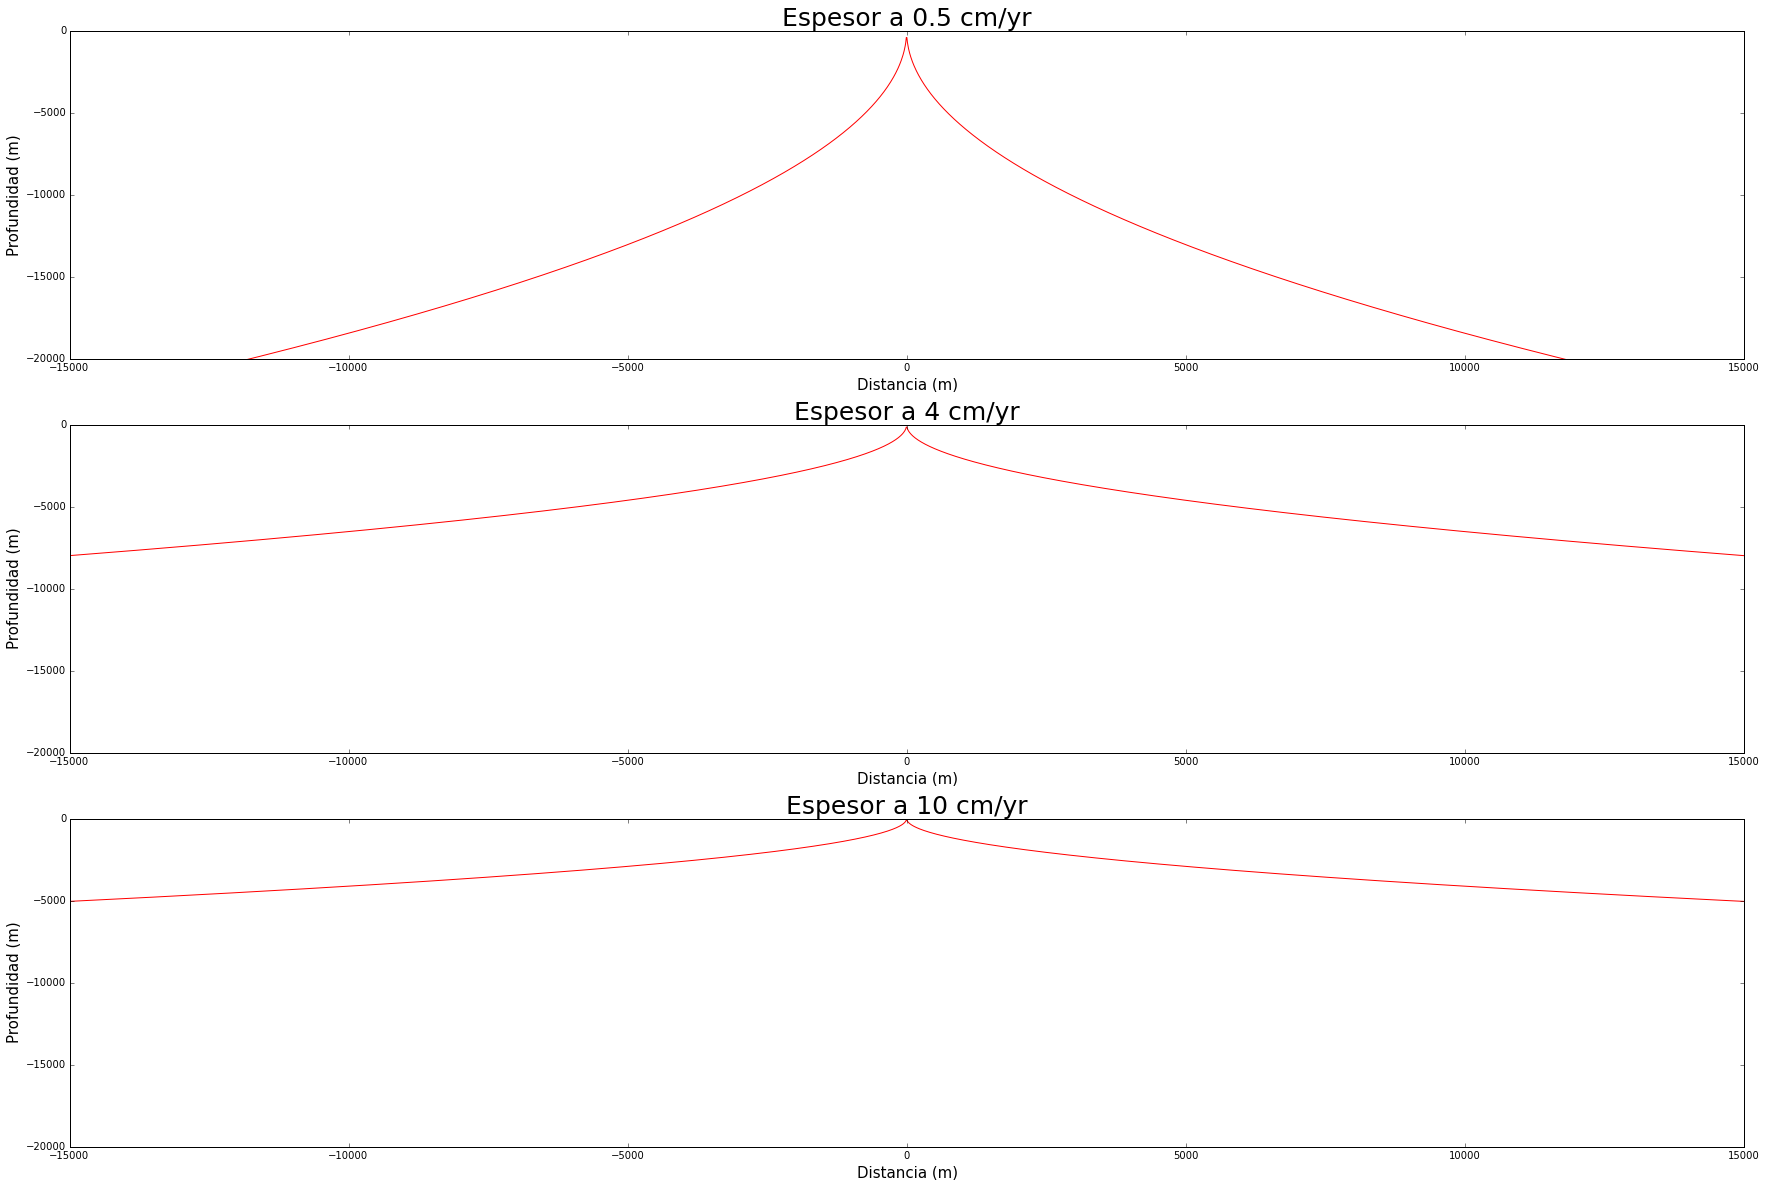

In [22]:
#Gráficas de los espesores obtenidos
fig2 = plt.subplots(nrows=3, ncols=1, figsize=(30, 20))
#gráfico para 0.5cm/yr
plt.subplot(3,1,1)
plot(x,espesor(x,v1),'r')
plt.ylim(-20000,0)
plt.title('Espesor a 0.5 cm/yr ', fontsize=25)
plt.xlabel('Distancia (m)', fontsize=15)
plt.ylabel('Profundidad (m)', fontsize=15)
#gráfico para 4cm/yr
plt.subplot(3,1,2)
plot(x,espesor(x,v2),'r')
plt.ylim(-20000,0)
plt.title('Espesor a 4 cm/yr', fontsize=25)
plt.xlabel('Distancia (m)', fontsize=15)
plt.ylabel('Profundidad (m)', fontsize=15)
#gráfico para 10cm/yr
plt.subplot(3,1,3)
plot(x,espesor(x,v3),'r')
plt.ylim(-20000,0)
plt.title('Espesor a 10 cm/yr', fontsize=25)
plt.xlabel('Distancia (m)', fontsize=15)
plt.ylabel('Profundidad (m)', fontsize=15)

plt.show()

De las gráficas obtenidas se puede concluir que a mayor velocidad media de placa menor será el espesor de la litósfera oceánica, esto se puede argumentar por el hecho de que a mayor velocidad el material caliente sera transportado más lejos de la dorsal impidiendo que se profundize y muestre el espesor del caso de menor velocidad.

#### c) Ahora, se muestra la batimetría junto con lo obtenido en el paso b). Para hallar la batimetría se usó la siguiente ecuación.

$$w_{e}=\frac{2\rho_{m}\alpha(T_{1}-T_{o})}{(\rho_{m}-\rho_{a})}(\frac{kx}{\pi v})^{0.5}$$

Donde:  
pm es la densidad del manto (kg/m^3)  
alfa es el coeficiente de expansión térmica (1/K)  
T1 es la temperatura del manto (K)  
To es la temperatura en la superficie (K)  
k es la difusividad térmica (m^2/s)  
x es la distancia horizontal a la dorsal (m)  
pa es la densidad del agua (kg/m^3)  
v es la velocidad media de la placa (m/s)

In [23]:
#Constantes de entrada
dm = 3300  #densidad del manto (kg/m3)
da = 1000  #densidad del agua (kg/m3)
alpha = 1.6*10**-5 #coeficiente de expansión térmica 
TmTo = 1300 #diferencia de temperaturas entre manto y superficie ()

In [24]:
#Definir función de batimetría (signo menos por convención)
def bath(x,v):
    return (-2*dm/(dm-da))*alpha*TmTo*(np.sqrt(k*abs(x)/v)/np.sqrt(np.pi))

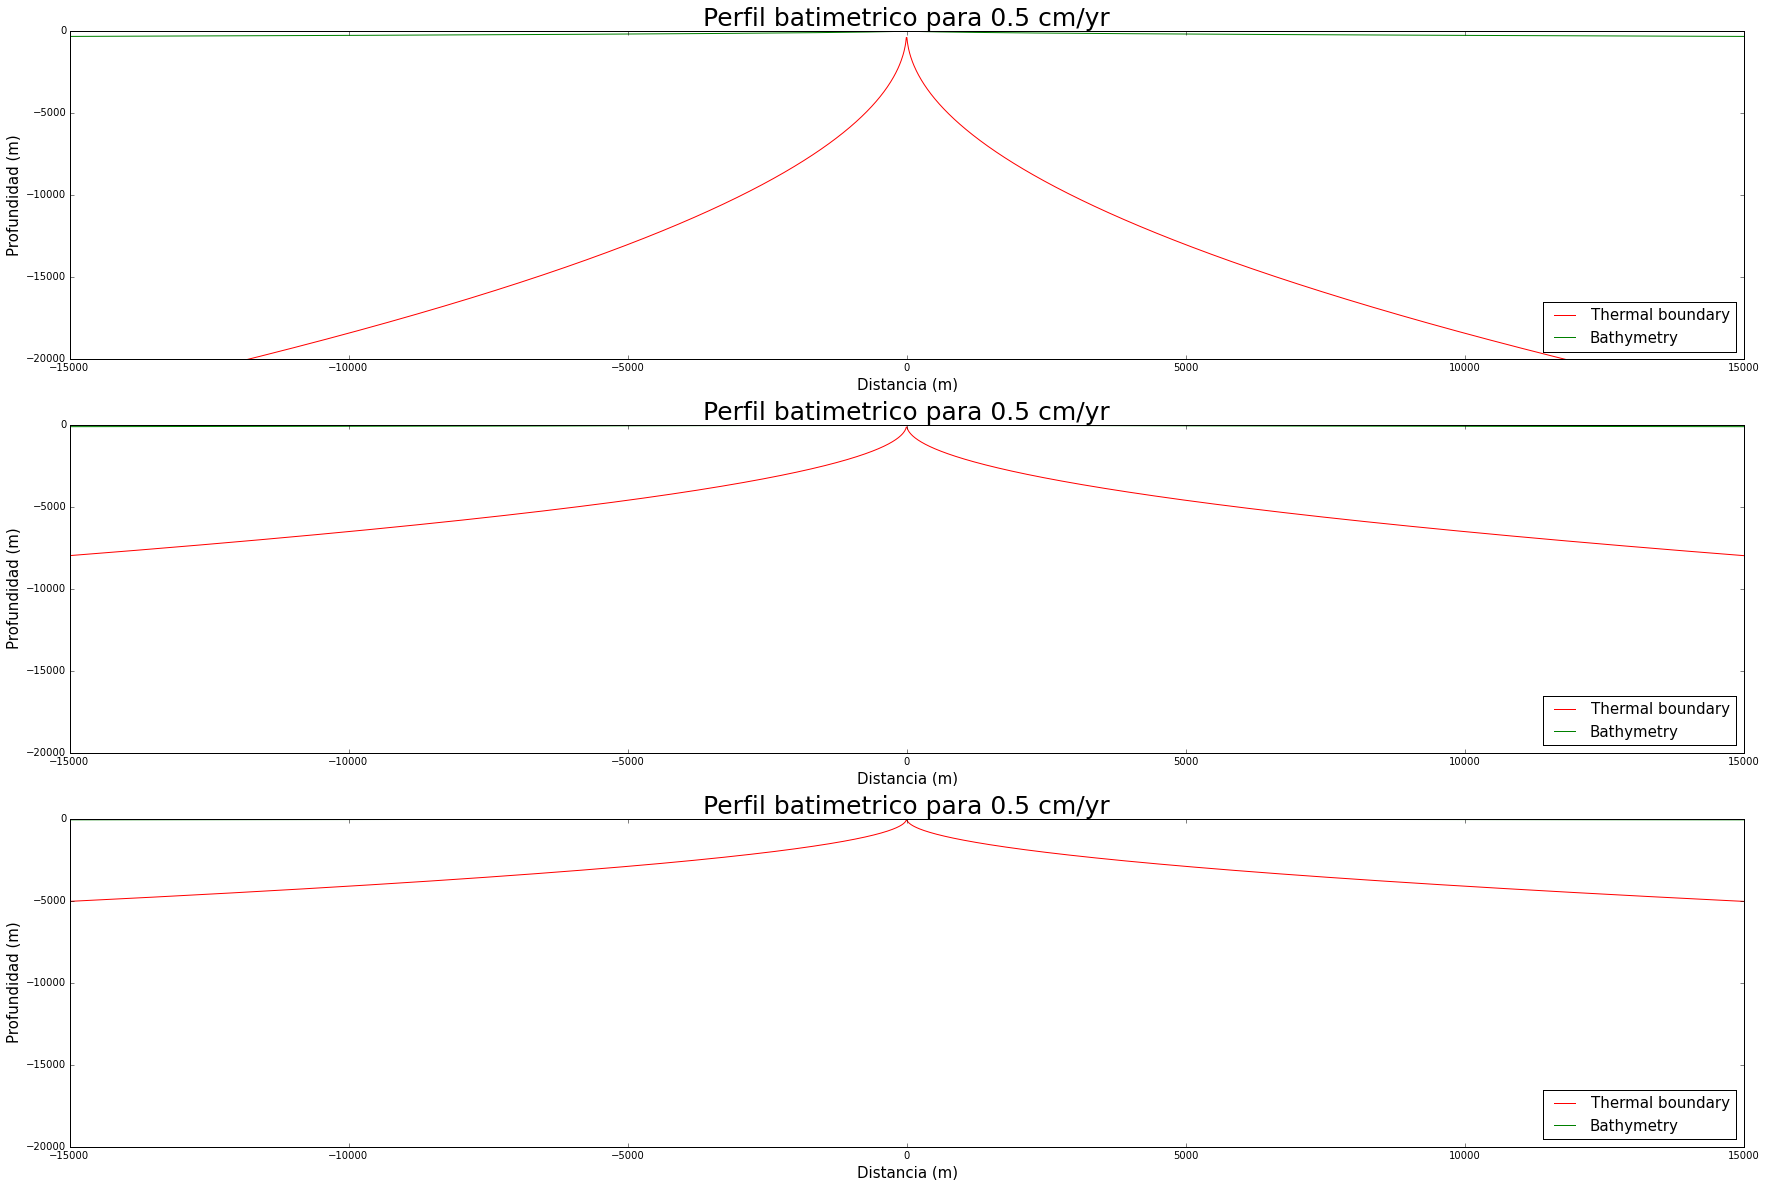

In [25]:
#Gráficas de la batimetría y el espesor
fig = plt.subplots(nrows=3, ncols=1, figsize=(30, 20))
#gráfico para 0.5cm/yr
plt.subplot(3,1,1)
plot(x,espesor(x,v1), label= "Thermal boundary", c='r')
plot(x,bath(x,v1), label= "Bathymetry", c='g')
plt.ylim(-20000,0)
plt.title('Perfil batimetrico para 0.5 cm/yr', fontsize=25)
plt.xlabel('Distancia (m)', fontsize=15)
plt.ylabel('Profundidad (m)', fontsize=15)
legend(fontsize=15, loc=4)
#gráfico para 4cm/yr
plt.subplot(3,1,2)
plot(x,espesor(x,v2), label= "Thermal boundary", c='r')
plot(x,bath(x,v2), label= "Bathymetry", c='g')
plt.ylim(-20000,0)
plt.title('Perfil batimetrico para 0.5 cm/yr', fontsize=25)
plt.xlabel('Distancia (m)', fontsize=15)
plt.ylabel('Profundidad (m)', fontsize=15)
legend(fontsize=15, loc=4)
#gráfico para 10cm/yr
plt.subplot(3,1,3)
plot(x,espesor(x,v3), label= "Thermal boundary", c='r')
plot(x,bath(x,v3), label= "Bathymetry", c='g')
plt.ylim(-20000,0)
plt.title('Perfil batimetrico para 0.5 cm/yr', fontsize=25)
plt.xlabel('Distancia (m)', fontsize=15)
plt.ylabel('Profundidad (m)', fontsize=15)
legend(fontsize=15, loc=4)

plt.show()

Los perfiles batimétricos muestran que a una menor velocidad media de placa la profundidad de la batimetría es mayor, esto se puede justificar desde el punto de vista de que el material (roca) se enfría y empieza a profundizarse muy cerca de la dorsal, contrario a los casos donde la velocidad es mayor porque el material ya ha sido desplazado más lejos de la dorsal.

#### d) A continuación, se muestran las gráficas de tiempos de relajación como función de temperatura en cortezas oceánicas (modelo viscoelástico tipo Maxwell.

$$\tau=\frac{\sigma^{1-n}e^{\frac{Q}{R\pi}}}{2AE}$$

Donde:  
t es el tiempo de relajación  
sigma es esfuerzo (MPa)  
n es una constante empírica  
Q es la energía de activación (J/mol)  
R es la constante de los gases ideales (J/mol*K)  
E es el modulo de Young (MPa)  
A es una constante experimental (1/s*MPa^n)  

In [26]:
#Constantes y arreglos de entrada para una corteza félsica
Q = 240*10**3 #Energía de Activación (J/mol)
R = 8.3145 #Constante de los gases (J/mol*ªC)
A = 8*10**(-3) #Constante experimental (1/s*MPa^n)
E = 50*10**(3) #modulo de Young (MPa)
n = 3.1
t = np.linspace(0,2000,100)

In [27]:
#Definir función del tiempo
def tiempo(t,sigma):
    return ((sigma**(1-n))*(e**(Q/(R*t))))/(2*A*E)

In [28]:
#Asumiendo que en la corteza a 1kbar = 3,3Km y que 1kbar = 10^-6MPa puedo obtener el esfuerzo
#A 10Km
sigma1=(10*(10**(-6))*(1/3.3))
#A 30Km
sigma2=(30*(10**(-6))*(1/3.3))
#A 60Km
sigma3=(60*(10**(-6))*(1/3.3))
#A 90Km
sigma4=(90*(10**(-6))*(1/3.3))
#A 120Km
sigma5=(120*(10**(-6))*(1/3.3))

/Users/AlejandroRodriguez/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()
/Users/AlejandroRodriguez/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: overflow encountered in power
  app.launch_new_instance()


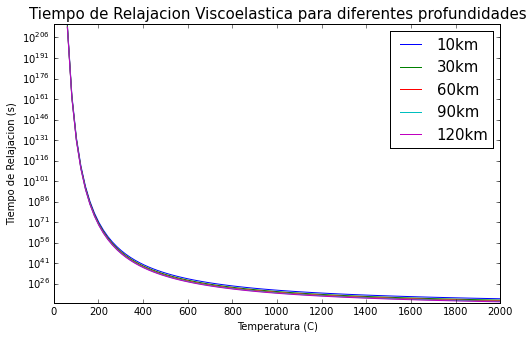

In [29]:
#Gráfico del tiempo de relajación
figure(figsize(8,5))
#A 10Km
plt.semilogy(t,tiempo(t,sigma1),label="10km")
#A 30Km
plt.semilogy(t,tiempo(t,sigma2),label="30km")
#A 60Km
plt.semilogy(t,tiempo(t,sigma3),label="60km")
#A 90Km
plt.semilogy(t,tiempo(t,sigma4),label="90km")
#A 120Km
plt.semilogy(t,tiempo(t,sigma5),label="120km")
legend(fontsize=15)
plt.xticks(np.arange(0,2001,200))
plt.title('Tiempo de Relajacion Viscoelastica para diferentes profundidades', fontsize=15)
plt.xlabel('Temperatura (C)', fontsize=10)
plt.ylabel('Tiempo de Relajacion (s)', fontsize=10)

A pesar de que todo el modelo es viscoelástico. Podemos ver que para temperaturas menores a 200ºC el tiempo de relajación es muy grande, el cual corresponde a un comportamiento más elástico. Para temperaturas mayores a 600ºC  los tiempos de relajación son menores y se aproximan al comportamiento viscoso. Para el rango intermedio se interpreta como un comportamiento viscoelástico más notorio.

#### e)El rango de temperatura donde se genera el cambio de comportamiento en la gráfica de tiempo de relajación es entre 300-350K, por lo tanto, se limpian los datos de las gráficas obtenidas en 1a) haciendo que todos los valores diferentes a ese rango sean iguales a 0 para poder ver hasta donde llega el espesor elástico.

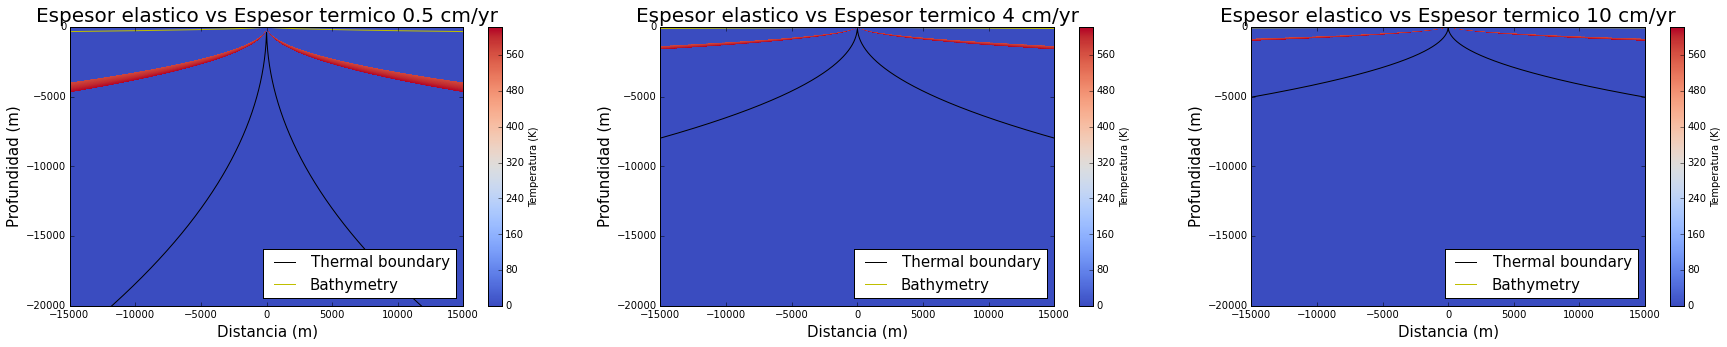

In [30]:
#Graficas de espesor elástico
fig = plt.subplots(nrows=1, ncols=3, figsize=(30, 5))
plt.subplot(1,3,1)
#limpieza de datos 1
TT = T05
for P in range(2000):
    for L in range(3000):
        if T05[P,L] < 573.15:
            TT[P,L] = 0.0
        elif T05[P,L] > 623.15:
            TT[P,L] = 0.0
        else:
            TT[P,L] = T05[P,L]
imshow(TT,extent=[x.min(), x.max(), z.min(), z.max()], cmap=cm.coolwarm,aspect= 'auto')
barra=plt.colorbar()
barra.set_label('Temperatura (K)')
plt.title('Espesor elastico vs Espesor termico 0.5 cm/yr', fontsize=20)
plt.xlabel('Distancia (m)', fontsize=15)
plt.ylabel('Profundidad (m)', fontsize=15)
plot(x,espesor(x,v1), label= "Thermal boundary", c='black')
plot(x,bath(x,v1), label= "Bathymetry", c='y')
plt.ylim(ymin=-20000)
legend(fontsize=15, loc=4)
plt.subplot(1,3,2)
#limpieza de datos 2
TT2 = T4
for P in range(2000):
    for L in range(3000):
        if T4[P,L] < 573.15:
            TT2[P,L] = 0.0
        elif T4[P,L] > 623.15:
            TT2[P,L] = 0.0
        else:
            TT2[P,L] = T4[P,L]
imshow(TT2,extent=[x.min(), x.max(), z.min(), z.max()], cmap=cm.coolwarm,aspect= 'auto')
barra=plt.colorbar()
barra.set_label('Temperatura (K)')
plt.title('Espesor elastico vs Espesor termico 4 cm/yr', fontsize=20)
plt.xlabel('Distancia (m)', fontsize=15)
plt.ylabel('Profundidad (m)', fontsize=15)
plot(x,espesor(x,v2), label= "Thermal boundary", c='black')
plot(x,bath(x,v2), label= "Bathymetry", c='y')
plt.ylim(ymin=-20000)
legend(fontsize=15, loc=4)
plt.subplot(1,3,3)
#limpieza de datos 3
TT3 = T10
for P in range(2000):
    for L in range(3000):
        if T10[P,L] < 573.15:
            TT3[P,L] = 0.0
        elif T10[P,L] > 623.15:
            TT3[P,L] = 0.0
        else:
            TT3[P,L] = T10[P,L]
imshow(TT3,extent=[x.min(), x.max(), z.min(), z.max()], cmap=cm.coolwarm,aspect= 'auto')
barra=plt.colorbar()
barra.set_label('Temperatura (K)')
plt.title('Espesor elastico vs Espesor termico 10 cm/yr', fontsize=20)
plt.xlabel('Distancia (m)', fontsize=15)
plt.ylabel('Profundidad (m)', fontsize=15)
plot(x,espesor(x,v3), label= "Thermal boundary", c='black')
plot(x,bath(x,v3), label= "Bathymetry", c='y')
plt.ylim(ymin=-20000)
legend(fontsize=15, loc=4)

El espesor elástico es mucho menor que el espesor térmico de la litósfera oceánica para las tres velocidades medias de placa. Para el caso de menor velocidad el espesor elástico es mayor que en el caso de mayor velocidad, sin embargo en correlación a cada espesor termal correspondiente se podría decir que son práctimante constantes.

#### f)

Si la convección del manto era mayor anteriormente (i.e. la velocidad de las placas eran mayores), entonces el espesor elástico era prácticamente nulo. Entre más delgado sea el espesor elástico efectivo más facil será la generación de flexura de acuerdo a las ecuaciones vistas en clase. Adicionalmente, al no poseer corteza elástica se podría decir que reológicamente la tectónica antigua consistía más de placas que se comportaban prácticamente de manera viscosa (i.e como fluido). Entonce, se esperaría que no hubiera tectónica de placas como la conocemos porque no habría placas rígidas que se mueven sobre masas viscosas porque todo sería prácticamente viscoso.